In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
def db_scan_search(eps_test, min_samp, X):
    db = DBSCAN(eps=eps_test, min_samples=min_samp).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    labels_, counts = np.unique(labels, return_counts=True)
    print(eps_test, min_samp)
    print(counts)
    print('x'*50)
    return db

In [20]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

db = db_scan_search(.25,11, X)
labels = db.labels_
df['db_labels'] = db.labels_
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
labels_for_plot = np.unique(labels)

df['pca_one'] = pca_one
df['pca_two'] = pca_two


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.25 11
[15574 16544  3604  8052  1366   401    19   123     8     8    11    22
    14    11    33    10    23    31    14    21    79    19    11    14
    11    13    11    87    11    10    10     8    11    11    13    13
     7    11    12     8    10    10    11]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


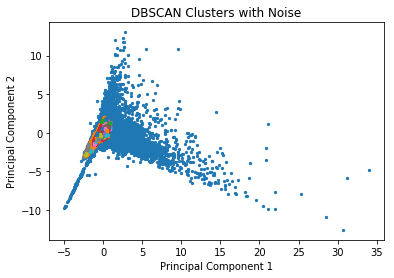

In [5]:
#use the following blocks of code to make the noise in the graph grey
# labels_for_plot = np.unique(labels)[1:]
# labels_for_plot
# new_df = df[df.db_labels == -1]
# df_pca_one = new_df.pca_one
# df_pca_two = new_df.pca_two
# plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel, color='grey')


labels_for_plot = np.unique(labels)

for dblabel in labels_for_plot:
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('DBSCAN Clusters with Noise')
# plt.savefig('../../visualization/PCA_plots/dbscan/db_p3_11.svg')

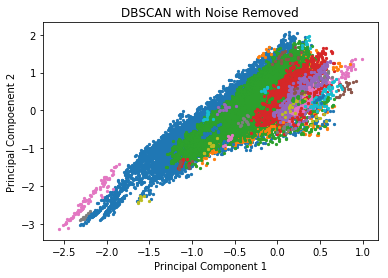

In [6]:


labels_for_plot = np.unique(labels)
labels_for_plot=labels_for_plot[1:]
for dblabel in labels_for_plot:
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Compoenent 2')
plt.title('DBSCAN with Noise Removed')
# plt.savefig('../../visualization/PCA_plots/dbscan/db_p3_11_noNoise.svg')

In [25]:
plt.rcParams['axes.prop_cycle'].by_key()['color']


['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [31]:
from cycler import cycler
default_cycler =['#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

Text(0.5, 1.0, 'DBSCAN with Noise Removed')

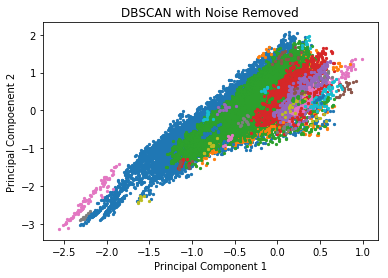

In [33]:
labels_for_plot = np.unique(labels)
labels_for_plot=labels_for_plot[1:]
for dblabel in labels_for_plot:
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Compoenent 2')
plt.title('DBSCAN with Noise Removed')
# plt.savefig('../../visualization/PCA_plots/dbscan/db_p3_11_noNoise.svg')

In [149]:
df.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,4.629000e+04,4.629000e+04
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.523720,6.263970e-16,-3.111215e-16
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,2.979092,1.370433e+00,1.072887e+00
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000,-4.956021e+00,-1.259332e+01
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,-1.000000,-5.883110e-01,-5.398877e-01
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000,-2.080571e-01,8.601545e-03
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,1.000000,2.157300e-01,5.361240e-01
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,41.000000,3.398984e+01,1.302869e+01


In [105]:
df[df.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.654400e+04,16544.000000,16544.000000,16544.0,16544.000000,16544.000000,16544.0,16544.000000,16544.000000,16544.0,16544.000000,16544.0,16544.000000,16544.000000
mean,4.628117e+09,36.840184,0.440462,0.0,0.039226,4367.486076,0.0,41.843856,-87.687843,0.0,0.014753,0.0,-0.607763,-0.171481
std,2.849726e+09,35.960665,0.971931,0.0,0.028747,3448.662252,0.0,0.104839,0.069894,0.0,0.006753,0.0,0.434631,0.733585
min,1.010010e+08,0.000000,0.000000,0.0,0.000581,337.524862,0.0,41.644842,-87.846351,0.0,0.000233,0.0,-2.315472,-3.045253
25%,1.703004e+09,0.000000,0.000000,0.0,0.017324,1384.259708,0.0,41.747873,-87.736366,0.0,0.009886,0.0,-0.880116,-0.628134
50%,5.103004e+09,32.000000,0.000000,0.0,0.031264,3845.434789,0.0,41.838254,-87.684506,0.0,0.014208,0.0,-0.532054,-0.143859
75%,7.203002e+09,57.000000,1.000000,0.0,0.054555,5428.548635,0.0,41.942835,-87.640367,0.0,0.018805,0.0,-0.296131,0.330304
max,9.801001e+09,190.000000,9.000000,0.0,0.141427,10624.839242,0.0,42.023012,-87.524798,0.0,0.044308,0.0,0.563744,2.061992


In [106]:
df[df.db_labels==1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.604000e+03,3604.000000,3604.000000,3604.0,3604.000000,3604.000000,3604.0,3604.000000,3604.000000,3604.0,3604.000000,3604.0,3604.000000,3604.000000
mean,4.813916e+09,54.589623,0.513596,0.0,0.027183,3806.241502,0.0,41.834925,-87.678218,2.0,0.013337,1.0,-0.096787,0.241863
std,2.646264e+09,37.986982,0.970897,0.0,0.016807,3177.171015,0.0,0.090213,0.055227,0.0,0.005451,0.0,0.286790,0.560085
min,1.010020e+08,0.000000,0.000000,0.0,0.000754,337.524862,0.0,41.659782,-87.832585,2.0,0.000480,1.0,-1.001457,-1.471991
25%,2.412001e+09,26.000000,0.000000,0.0,0.014596,1266.752533,0.0,41.757274,-87.717767,2.0,0.009183,1.0,-0.247834,-0.149535
50%,4.911005e+09,51.000000,0.000000,0.0,0.023850,2867.068447,0.0,41.823548,-87.672458,2.0,0.013186,1.0,-0.059761,0.267974
75%,7.107001e+09,80.000000,1.000000,0.0,0.035641,5428.548635,0.0,41.913196,-87.638229,2.0,0.017246,1.0,0.098243,0.657565
max,8.439002e+09,173.000000,8.000000,0.0,0.083360,10624.839242,0.0,42.021859,-87.548960,2.0,0.028046,1.0,0.581116,1.747351


In [107]:
df[df.db_labels==2].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.052000e+03,8052.000000,8052.000000,8052.0,8052.000000,8052.000000,8052.0,8052.000000,8052.000000,8052.0,8052.000000,8052.0,8052.000000,8052.000000
mean,4.528974e+09,50.247516,0.586314,0.0,0.031137,4005.670046,0.0,41.842739,-87.682364,1.0,0.013657,2.0,-0.301260,0.122638
std,2.724823e+09,36.664670,1.107500,0.0,0.020571,3244.555502,0.0,0.096747,0.059106,0.0,0.005751,0.0,0.340881,0.608062
min,1.010020e+08,0.000000,0.000000,0.0,0.000308,337.524862,0.0,41.650960,-87.837829,1.0,0.000676,2.0,-1.298267,-1.528135
25%,1.913011e+09,23.000000,0.000000,0.0,0.015524,1384.259708,0.0,41.758690,-87.721165,1.0,0.009486,2.0,-0.521484,-0.316785
50%,4.905001e+09,47.000000,0.000000,0.0,0.026197,3272.478661,0.0,41.839310,-87.678167,1.0,0.013458,2.0,-0.257291,0.130327
75%,7.001001e+09,72.000000,1.000000,0.0,0.042940,5428.548635,0.0,41.931933,-87.641115,1.0,0.017451,2.0,-0.057221,0.554180
max,8.439005e+09,171.000000,9.000000,0.0,0.106167,10624.839242,0.0,42.021371,-87.532492,1.0,0.032974,2.0,0.562384,1.863996


In [108]:
df[df.db_labels==3].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.366000e+03,1366.000000,1366.000000,1366.0,1366.000000,1366.000000,1366.0,1366.000000,1366.000000,1366.0,1366.000000,1366.0,1366.000000,1366.000000
mean,5.040725e+09,57.926061,0.372621,0.0,0.021543,3176.926696,0.0,41.835811,-87.677449,3.0,0.012419,3.0,0.135916,0.417718
std,2.653830e+09,36.428017,0.650351,0.0,0.010599,2844.342107,0.0,0.080169,0.048614,0.0,0.004543,0.0,0.182532,0.438377
min,1.010010e+08,0.000000,0.000000,0.0,0.000703,337.524862,0.0,41.685802,-87.821310,3.0,0.002063,3.0,-0.308409,-0.621503
25%,2.513002e+09,32.000000,0.000000,0.0,0.013412,1151.314667,0.0,41.768710,-87.712976,3.0,0.009042,3.0,0.007207,0.081924
50%,5.906502e+09,55.000000,0.000000,0.0,0.020569,1384.259708,0.0,41.819490,-87.672557,3.0,0.012381,3.0,0.117787,0.390202
75%,7.114002e+09,86.000000,1.000000,0.0,0.029176,5034.332208,0.0,41.898909,-87.642553,3.0,0.015374,3.0,0.258004,0.722927
max,8.438002e+09,145.000000,4.000000,0.0,0.054428,10624.839242,0.0,42.023024,-87.575035,3.0,0.024377,3.0,0.661228,1.646627


In [109]:
df[df.db_labels==4].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,4.010000e+02,401.000000,401.000000,401.0,401.000000,401.000000,401.0,401.000000,401.000000,401.0,401.000000,401.0,401.000000,401.000000
mean,4.989046e+09,59.376559,0.269327,0.0,0.019265,2591.857269,0.0,41.835839,-87.679419,4.0,0.014001,4.0,0.263534,0.370824
std,2.596317e+09,32.733398,0.531302,0.0,0.008111,2535.814838,0.0,0.073510,0.045516,0.0,0.003226,0.0,0.150546,0.369536
min,1.020110e+08,0.000000,0.000000,0.0,0.001749,337.524862,0.0,41.685898,-87.779919,4.0,0.005456,4.0,-0.055204,-0.493359
25%,2.519002e+09,35.000000,0.000000,0.0,0.013396,774.073073,0.0,41.771714,-87.716192,4.0,0.011770,4.0,0.151380,0.098633
50%,6.006001e+09,61.000000,0.000000,0.0,0.019702,1384.259708,0.0,41.841698,-87.671719,4.0,0.013712,4.0,0.246471,0.352838
75%,6.915003e+09,84.000000,0.000000,0.0,0.025347,4449.553645,0.0,41.890555,-87.646515,4.0,0.016138,4.0,0.367530,0.635969
max,8.436001e+09,127.000000,2.000000,0.0,0.038153,10624.839242,0.0,42.017288,-87.592768,4.0,0.022470,4.0,0.620709,1.295428


In [8]:
df[df.db_labels==5].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.900000e+01,19.000000,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.0,19.000000,19.000000
mean,3.644637e+09,176.000000,0.789474,0.0,0.015478,2361.331000,0.0,41.904174,-87.666382,1.0,0.012960,5.0,0.102506,1.422999
std,3.446558e+09,8.679478,0.787327,0.0,0.002509,1516.399734,0.0,0.066029,0.040984,0.0,0.001101,0.0,0.095281,0.122549
min,1.020130e+08,160.000000,0.000000,0.0,0.010813,337.524862,0.0,41.801624,-87.735588,1.0,0.011343,5.0,-0.061903,1.220818
25%,7.630010e+08,169.500000,0.000000,0.0,0.014034,1016.829306,0.0,41.852194,-87.694584,1.0,0.012167,5.0,0.043007,1.346849
50%,2.416001e+09,177.000000,1.000000,0.0,0.015070,2336.259623,0.0,41.900598,-87.670760,1.0,0.012903,5.0,0.084148,1.403923
75%,8.363002e+09,182.500000,1.000000,0.0,0.016262,3297.277710,0.0,41.963009,-87.643020,1.0,0.013532,5.0,0.170398,1.520701
max,8.422001e+09,191.000000,2.000000,0.0,0.020877,5357.830394,0.0,42.012776,-87.597989,1.0,0.015294,5.0,0.270514,1.665025


In [111]:
df[df.db_labels==6].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.230000e+02,123.000000,123.000000,123.0,123.000000,123.000000,123.0,123.000000,123.000000,123.0,123.000000,123.0,123.000000,123.000000
mean,5.287792e+09,54.780488,0.268293,0.0,0.019695,2453.206015,0.0,41.828106,-87.680501,5.0,0.014342,6.0,0.392054,0.307894
std,2.402555e+09,18.947527,0.497093,0.0,0.006167,2086.826330,0.0,0.069844,0.043245,0.0,0.002690,0.0,0.129759,0.274371
min,2.030230e+08,16.000000,0.000000,0.0,0.003476,337.524862,0.0,41.697752,-87.771268,5.0,0.009725,6.0,0.137188,-0.359497
25%,2.561511e+09,42.000000,0.000000,0.0,0.016055,1151.314667,0.0,41.769768,-87.714491,5.0,0.012162,6.0,0.287158,0.091866
50%,6.702001e+09,54.000000,0.000000,0.0,0.020343,1384.259708,0.0,41.798576,-87.670512,5.0,0.013565,6.0,0.400034,0.321899
75%,6.861503e+09,64.500000,0.000000,0.0,0.024034,3994.472404,0.0,41.884489,-87.651222,5.0,0.016401,6.0,0.469443,0.515314
max,8.430002e+09,98.000000,2.000000,0.0,0.029830,10624.839242,0.0,42.011481,-87.595051,5.0,0.021197,6.0,0.726730,0.852552


In [112]:
df[df.db_labels==7].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.000000e+00,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000
mean,4.370756e+09,1.875000,4.375000,0.0,0.031548,4257.255884,0.0,41.859740,-87.687998,2.0,0.014424,7.0,0.089883,-0.482660
std,3.241123e+09,2.356602,0.517549,0.0,0.002620,4173.592140,0.0,0.119582,0.039861,0.0,0.000927,0.0,0.053300,0.079163
min,2.080210e+08,0.000000,4.000000,0.0,0.027810,1151.314667,0.0,41.706686,-87.745416,2.0,0.012699,7.0,-0.008340,-0.597993
25%,1.253756e+09,0.000000,4.000000,0.0,0.029700,1293.702363,0.0,41.777206,-87.703474,2.0,0.014191,7.0,0.073800,-0.535347
50%,5.512003e+09,1.500000,4.000000,0.0,0.031533,1820.550281,0.0,41.860422,-87.686908,2.0,0.014884,7.0,0.089041,-0.474572
75%,6.555002e+09,2.250000,5.000000,0.0,0.033099,6727.621286,0.0,41.967446,-87.660046,2.0,0.015008,7.0,0.112683,-0.442882
max,8.313001e+09,7.000000,5.000000,0.0,0.035858,10624.839242,0.0,41.991243,-87.642200,2.0,0.015142,7.0,0.178230,-0.361291


In [113]:
df[df.db_labels==8].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.000000e+00,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000
mean,9.010040e+08,22.000000,0.125000,0.0,0.050706,4018.870379,0.0,42.016635,-87.819711,0.0,0.045176,8.0,-1.594519,-2.352553
std,9.590732e+00,8.485281,0.353553,0.0,0.001411,0.000000,0.0,0.000741,0.000819,0.0,0.000670,0.0,0.041614,0.073365
min,9.010040e+08,14.000000,0.000000,0.0,0.049262,4018.870379,0.0,42.015496,-87.820743,0.0,0.044253,8.0,-1.635276,-2.447737
25%,9.010040e+08,15.000000,0.000000,0.0,0.049644,4018.870379,0.0,42.016273,-87.820187,0.0,0.044832,8.0,-1.617027,-2.403471
50%,9.010040e+08,19.500000,0.000000,0.0,0.050400,4018.870379,0.0,42.016508,-87.820067,0.0,0.045085,8.0,-1.604673,-2.364977
75%,9.010040e+08,26.750000,0.000000,0.0,0.051333,4018.870379,0.0,42.017080,-87.819049,0.0,0.045773,8.0,-1.587471,-2.285374
max,9.010040e+08,36.000000,1.000000,0.0,0.053343,4018.870379,0.0,42.017863,-87.818302,0.0,0.046008,8.0,-1.507269,-2.259448


In [114]:
df[df.db_labels==9].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,1.107642e+09,192.454545,0.090909,0.0,0.009290,3184.244398,0.0,41.956433,-87.701667,2.0,0.010888,9.0,0.341502,1.810059
std,7.969440e+08,11.911034,0.301511,0.0,0.001844,1656.332199,0.0,0.037878,0.044033,0.0,0.000718,0.0,0.029513,0.106851
min,1.020130e+08,175.000000,0.000000,0.0,0.005280,714.328985,0.0,41.886679,-87.774051,2.0,0.009580,9.0,0.290638,1.654586
25%,5.055075e+08,182.500000,0.000000,0.0,0.008433,1896.011482,0.0,41.950652,-87.719944,2.0,0.010665,9.0,0.332514,1.744940
50%,1.104001e+09,192.000000,0.000000,0.0,0.009190,3272.478661,0.0,41.971123,-87.707078,2.0,0.010932,9.0,0.345094,1.819454
75%,1.404013e+09,200.500000,0.000000,0.0,0.010811,4420.585111,0.0,41.972455,-87.663923,2.0,0.011294,9.0,0.361747,1.896800
max,2.520004e+09,209.000000,1.000000,0.0,0.011559,5428.548635,0.0,42.014475,-87.646275,2.0,0.011829,9.0,0.383541,1.955575


In [116]:
#good one
df[df.db_labels==10].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.200000e+01,22.000000,22.000000,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.0,22.000000,22.0,22.000000,22.000000
mean,3.964640e+09,6.090909,9.318182,0.0,0.013910,3343.567845,0.0,41.915713,-87.674740,0.0,0.011358,10.0,0.526656,-0.205419
std,3.520839e+09,8.422810,0.779888,0.0,0.002865,1519.471179,0.0,0.052586,0.037428,0.0,0.001403,0.0,0.073174,0.163235
min,3.050020e+08,0.000000,8.000000,0.0,0.008346,836.954141,0.0,41.809876,-87.756618,0.0,0.008925,10.0,0.399246,-0.466348
25%,9.645035e+08,0.000000,9.000000,0.0,0.012118,1872.744273,0.0,41.872938,-87.686888,0.0,0.010368,10.0,0.462186,-0.329643
50%,2.318502e+09,0.000000,9.000000,0.0,0.014177,3416.585176,0.0,41.925453,-87.667322,0.0,0.011364,10.0,0.534257,-0.265094
75%,8.328752e+09,12.000000,10.000000,0.0,0.016185,4917.129613,0.0,41.963660,-87.647296,0.0,0.012278,10.0,0.575278,-0.041740
max,8.432002e+09,21.000000,11.000000,0.0,0.018190,5428.548635,0.0,41.990360,-87.614204,0.0,0.014195,10.0,0.665664,0.107344


In [118]:
#Highish bus, close to el
df[df.db_labels==11].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.400000e+01,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.0,14.000000,14.000000
mean,4.876004e+09,1.000000,3.785714,0.0,0.015824,2390.298020,0.0,41.875528,-87.664080,3.0,0.008718,11.0,0.522385,0.124301
std,3.247865e+09,3.464102,0.699293,0.0,0.003169,2078.282379,0.0,0.055954,0.041148,0.0,0.000671,0.0,0.068155,0.085659
min,8.140120e+08,0.000000,3.000000,0.0,0.009956,561.752072,0.0,41.772844,-87.718640,3.0,0.007649,11.0,0.444381,-0.029611
25%,2.266251e+09,0.000000,3.000000,0.0,0.013989,729.265007,0.0,41.841705,-87.705500,3.0,0.008447,11.0,0.467015,0.088095
50%,3.508001e+09,0.000000,4.000000,0.0,0.015404,2336.259623,0.0,41.888378,-87.671371,3.0,0.008642,11.0,0.505078,0.125612
75%,8.368751e+09,0.000000,4.000000,0.0,0.018741,3171.126108,0.0,41.900645,-87.625500,3.0,0.009065,11.0,0.563254,0.164947
max,8.422001e+09,13.000000,5.000000,0.0,0.020374,7864.998619,0.0,41.961329,-87.605371,3.0,0.010201,11.0,0.658082,0.281501


In [119]:
df[df.db_labels==12].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,4.317191e+09,107.909091,0.454545,0.0,0.022873,3062.322320,0.0,41.885814,-87.711568,3.0,0.021806,12.0,-0.047580,0.219168
std,2.938731e+09,10.014535,0.522233,0.0,0.001666,2002.761713,0.0,0.049974,0.024076,0.0,0.000649,0.0,0.061224,0.116080
min,1.502001e+09,90.000000,0.000000,0.0,0.020492,714.328985,0.0,41.776571,-87.749848,3.0,0.020514,12.0,-0.124981,0.041563
25%,2.209021e+09,100.500000,0.000000,0.0,0.021753,1266.752533,0.0,41.860260,-87.724609,3.0,0.021398,12.0,-0.088953,0.130813
50%,2.522023e+09,110.000000,0.000000,0.0,0.022971,2336.259623,0.0,41.879037,-87.720618,3.0,0.021844,12.0,-0.067231,0.276907
75%,7.488001e+09,115.500000,1.000000,0.0,0.023674,5034.332208,0.0,41.922326,-87.687489,3.0,0.022160,12.0,-0.016627,0.300644
max,8.413002e+09,118.000000,1.000000,0.0,0.025511,5428.548635,0.0,41.956254,-87.683743,3.0,0.022847,12.0,0.066180,0.329727


In [120]:
df[df.db_labels==13].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.300000e+01,33.000000,33.000000,33.0,33.000000,33.000000,33.0,33.000000,33.000000,33.0,33.000000,33.0,33.000000,33.000000
mean,5.131214e+09,3.000000,0.303030,0.0,0.014158,1811.830379,0.0,41.860526,-87.683912,4.0,0.006268,13.0,0.449355,0.463898
std,2.788466e+09,6.139015,0.529437,0.0,0.006043,1987.843812,0.0,0.039051,0.041173,0.0,0.001197,0.0,0.086031,0.127831
min,8.140120e+08,0.000000,0.000000,0.0,0.002094,561.752072,0.0,41.775131,-87.742242,4.0,0.003810,13.0,0.310571,0.199226
25%,2.607002e+09,0.000000,0.000000,0.0,0.009659,714.328985,0.0,41.852371,-87.714303,4.0,0.005251,13.0,0.362182,0.362351
50%,3.510003e+09,0.000000,0.000000,0.0,0.014534,774.073073,0.0,41.863023,-87.706482,4.0,0.006336,13.0,0.448303,0.464406
75%,8.387001e+09,1.000000,1.000000,0.0,0.019788,1384.259708,0.0,41.884417,-87.635999,4.0,0.007231,13.0,0.506335,0.564852
max,8.431001e+09,24.000000,2.000000,0.0,0.024767,7864.998619,0.0,41.924232,-87.609021,4.0,0.008450,13.0,0.632922,0.681702


In [121]:
df[df.db_labels==14].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.000000e+01,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000
mean,4.184905e+09,121.100000,0.300000,0.0,0.023216,2832.869046,0.0,41.824815,-87.682923,4.0,0.013565,14.0,0.319987,0.847251
std,1.659413e+09,5.685264,0.483046,0.0,0.002067,2594.759336,0.0,0.066652,0.068212,0.0,0.000941,0.0,0.068150,0.070889
min,2.507001e+09,111.000000,0.000000,0.0,0.020946,337.524862,0.0,41.748465,-87.760062,4.0,0.011849,14.0,0.245827,0.712922
25%,2.532754e+09,118.250000,0.000000,0.0,0.021954,1151.314667,0.0,41.762227,-87.751119,4.0,0.013005,14.0,0.269495,0.825529
50%,4.301508e+09,122.000000,0.000000,0.0,0.022903,1704.077760,0.0,41.813071,-87.688924,4.0,0.013512,14.0,0.297840,0.857523
75%,5.454757e+09,124.750000,0.750000,0.0,0.023874,5429.657168,0.0,41.895605,-87.612861,4.0,0.014227,14.0,0.354917,0.889247
max,7.101001e+09,129.000000,1.000000,0.0,0.028220,6487.262606,0.0,41.906666,-87.595899,4.0,0.014847,14.0,0.438261,0.962750


In [122]:
df[df.db_labels==15].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.300000e+01,23.000000,23.000000,23.0,23.000000,23.000000,23.0,23.000000,23.000000,23.0,23.000000,23.0,23.000000,23.000000
mean,4.762046e+09,68.782609,0.217391,0.0,0.016090,2210.379757,0.0,41.830988,-87.684384,7.0,0.012780,15.0,0.790345,0.580968
std,2.274468e+09,13.069592,0.421741,0.0,0.003943,2001.533566,0.0,0.060255,0.066079,0.0,0.001228,0.0,0.063453,0.139268
min,2.508002e+09,49.000000,0.000000,0.0,0.009662,561.752072,0.0,41.731913,-87.773652,7.0,0.010899,15.0,0.683719,0.343322
25%,2.519004e+09,58.500000,0.000000,0.0,0.012981,956.152665,0.0,41.769701,-87.749247,7.0,0.012031,15.0,0.734921,0.486995
50%,3.812002e+09,69.000000,0.000000,0.0,0.015688,1151.314667,0.0,41.859846,-87.670241,7.0,0.012430,15.0,0.779424,0.575584
75%,6.910003e+09,77.500000,0.000000,0.0,0.018898,3239.884821,0.0,41.884523,-87.616143,7.0,0.013501,15.0,0.832419,0.706096
max,8.387002e+09,90.000000,1.000000,0.0,0.023236,6487.262606,0.0,41.904802,-87.601887,7.0,0.015253,15.0,0.918614,0.772440


In [123]:
df[df.db_labels==16].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.100000e+01,31.000000,31.0,31.0,31.000000,31.000000,31.0,31.000000,31.000000,31.0,31.000000,31.0,31.000000,31.000000
mean,4.826712e+09,77.741935,0.0,0.0,0.012797,1327.775433,0.0,41.854105,-87.701603,6.0,0.006996,16.0,0.825968,1.071249
std,2.533019e+09,14.493603,0.0,0.0,0.003516,1430.390944,0.0,0.047419,0.045982,0.0,0.001449,0.0,0.059486,0.159263
min,2.315004e+09,49.000000,0.0,0.0,0.004136,561.752072,0.0,41.746489,-87.773433,6.0,0.004859,16.0,0.705030,0.819717
25%,2.602001e+09,68.000000,0.0,0.0,0.010226,714.328985,0.0,41.853795,-87.724640,6.0,0.006010,16.0,0.789167,0.944726
50%,3.011001e+09,77.000000,0.0,0.0,0.012735,774.073073,0.0,41.866746,-87.712533,6.0,0.006830,16.0,0.820947,1.067780
75%,7.639502e+09,88.500000,0.0,0.0,0.014664,1151.314667,0.0,41.890501,-87.671734,6.0,0.007848,16.0,0.863832,1.182198
max,8.429003e+09,104.000000,0.0,0.0,0.020257,6487.262606,0.0,41.896604,-87.604202,6.0,0.009807,16.0,0.984389,1.366221


In [124]:
df[df.db_labels==17].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.400000e+01,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.0,14.000000,14.000000
mean,3.920716e+09,36.571429,0.071429,0.0,0.011277,1508.908350,0.0,41.844895,-87.706253,4.0,0.005546,17.0,0.530434,0.837263
std,1.917855e+09,9.959258,0.267261,0.0,0.003374,1445.973740,0.0,0.054091,0.059522,0.0,0.000864,0.0,0.056157,0.102287
min,2.514004e+09,21.000000,0.000000,0.0,0.006876,714.328985,0.0,41.757019,-87.770986,4.0,0.004169,17.0,0.437498,0.654866
25%,2.517001e+09,29.750000,0.000000,0.0,0.009321,1094.342059,0.0,41.788812,-87.757665,4.0,0.004881,17.0,0.495734,0.779367
50%,2.564001e+09,38.000000,0.000000,0.0,0.010376,1151.314667,0.0,41.882145,-87.732599,4.0,0.005535,17.0,0.529414,0.832474
75%,5.983252e+09,43.750000,0.000000,0.0,0.013469,1326.023448,0.0,41.890165,-87.669709,4.0,0.006203,17.0,0.568226,0.873159
max,6.913001e+09,52.000000,1.000000,0.0,0.017523,6487.262606,0.0,41.893843,-87.615470,4.0,0.007101,17.0,0.635782,1.047544


In [125]:
df[df.db_labels==18].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.100000e+01,21.000000,21.000000,21.0,21.000000,21.000000,21.0,21.000000,21.000000,21.0,21.000000,21.0,21.000000,21.000000
mean,4.769483e+09,65.761905,0.190476,0.0,0.011575,3688.364267,0.0,41.809831,-87.664629,4.0,0.020087,18.0,0.196735,0.158561
std,2.294269e+09,11.103624,0.402374,0.0,0.002690,3205.121843,0.0,0.075847,0.059397,0.0,0.001503,0.0,0.078617,0.173186
min,1.020120e+08,39.000000,0.000000,0.0,0.006373,337.524862,0.0,41.711910,-87.756843,4.0,0.017033,18.0,0.055141,-0.171116
25%,2.521022e+09,56.000000,0.000000,0.0,0.010334,950.152855,0.0,41.764568,-87.719210,4.0,0.018805,18.0,0.145997,0.053694
50%,4.908003e+09,71.000000,0.000000,0.0,0.011401,4143.510018,0.0,41.770288,-87.633232,4.0,0.020374,18.0,0.184573,0.189271
75%,6.904002e+09,74.000000,0.000000,0.0,0.012160,5045.052583,0.0,41.876491,-87.617147,4.0,0.021351,18.0,0.244962,0.264437
max,8.436001e+09,80.000000,1.000000,0.0,0.019486,10624.839242,0.0,42.018163,-87.607670,4.0,0.022557,18.0,0.327135,0.475108


In [126]:
df[df.db_labels==19].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,7.900000e+01,79.000000,79.000000,79.0,79.000000,79.000000,79.0,79.000000,79.000000,79.0,79.000000,79.0,79.000000,79.000000
mean,5.981597e+09,58.873418,0.177215,0.0,0.019514,2210.579434,0.0,41.810322,-87.671699,6.0,0.014359,19.0,0.540916,0.349475
std,2.252225e+09,14.696386,0.384291,0.0,0.005022,1989.469097,0.0,0.053129,0.047369,0.0,0.002310,0.0,0.089107,0.197340
min,2.210002e+09,32.000000,0.000000,0.0,0.007746,337.524862,0.0,41.734820,-87.773593,6.0,0.009559,19.0,0.327881,-0.022183
25%,3.507501e+09,47.000000,0.000000,0.0,0.016112,805.513607,0.0,41.767796,-87.721806,6.0,0.012312,19.0,0.484259,0.198630
50%,6.810002e+09,61.000000,0.000000,0.0,0.020145,1384.259708,0.0,41.789504,-87.661164,6.0,0.014281,19.0,0.541573,0.316754
75%,8.346001e+09,70.000000,0.000000,0.0,0.022901,4137.391038,0.0,41.869657,-87.637402,6.0,0.016542,19.0,0.597410,0.515963
max,8.436002e+09,85.000000,1.000000,0.0,0.029620,6487.262606,0.0,41.918426,-87.595528,6.0,0.018346,19.0,0.755684,0.827254


In [127]:

df[df.db_labels==20].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.900000e+01,19.000000,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.0,19.000000,19.000000
mean,6.261426e+09,0.263158,0.105263,0.0,0.073912,7902.797103,0.0,41.727638,-87.607734,1.0,0.008539,20.0,-0.788966,-0.576019
std,1.487496e+09,0.805682,0.315302,0.0,0.003815,3923.003350,0.0,0.030989,0.072173,0.0,0.001292,0.0,0.069041,0.105788
min,4.313023e+09,0.000000,0.000000,0.0,0.066606,1384.259708,0.0,41.677628,-87.729003,1.0,0.006527,20.0,-0.878348,-0.716967
25%,5.101001e+09,0.000000,0.000000,0.0,0.071373,5315.386312,0.0,41.706174,-87.667734,1.0,0.007549,20.0,-0.849050,-0.657126
50%,6.502001e+09,0.000000,0.000000,0.0,0.074247,10624.839242,0.0,41.721945,-87.563622,1.0,0.008450,20.0,-0.824235,-0.597609
75%,7.503503e+09,0.000000,0.000000,0.0,0.076285,10624.839242,0.0,41.749550,-87.553887,1.0,0.009625,20.0,-0.727933,-0.502051
max,8.388002e+09,3.000000,1.000000,0.0,0.082009,10624.839242,0.0,41.783334,-87.545131,1.0,0.010925,20.0,-0.672313,-0.372439


In [128]:
df[df.db_labels==21].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.289822e+09,83.727273,0.090909,0.0,0.013184,1825.444144,0.0,41.852152,-87.703249,5.0,0.005955,21.0,0.716196,1.173799
std,2.777652e+09,10.179302,0.301511,0.0,0.002478,2315.335434,0.0,0.051598,0.046995,0.0,0.000771,0.0,0.053779,0.064732
min,2.511001e+09,67.000000,0.000000,0.0,0.010136,337.524862,0.0,41.749819,-87.751910,5.0,0.004979,21.0,0.648444,1.080067
25%,2.608002e+09,75.000000,0.000000,0.0,0.010918,714.328985,0.0,41.852585,-87.724598,5.0,0.005399,21.0,0.688421,1.119466
50%,4.402012e+09,83.000000,0.000000,0.0,0.013361,774.073073,0.0,41.860022,-87.710185,5.0,0.005820,21.0,0.713821,1.176541
75%,8.391002e+09,92.500000,0.000000,0.0,0.014936,1151.314667,0.0,41.885588,-87.708707,5.0,0.006468,21.0,0.729415,1.235969
max,8.415002e+09,98.000000,1.000000,0.0,0.017636,6487.262606,0.0,41.899309,-87.610375,5.0,0.007474,21.0,0.849464,1.255117


In [129]:
df[df.db_labels==22].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.400000e+01,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.0,14.000000,14.000000
mean,5.630578e+09,26.571429,0.357143,0.0,0.031252,6062.648661,0.0,41.765125,-87.641561,4.0,0.007644,22.0,0.249143,0.319150
std,1.857826e+09,6.284465,0.497245,0.0,0.002473,4468.110708,0.0,0.072789,0.032627,0.0,0.000967,0.0,0.057941,0.096554
min,2.306003e+09,17.000000,0.000000,0.0,0.026953,714.328985,0.0,41.691529,-87.729173,4.0,0.006043,22.0,0.167936,0.165651
25%,4.909023e+09,22.000000,0.000000,0.0,0.029959,1384.259708,0.0,41.699840,-87.648787,4.0,0.007034,22.0,0.198137,0.256920
50%,5.517001e+09,26.500000,0.000000,0.0,0.030711,6487.262606,0.0,41.752874,-87.645238,4.0,0.007505,22.0,0.243120,0.306353
75%,6.856752e+09,31.750000,1.000000,0.0,0.032720,10624.839242,0.0,41.796990,-87.621568,4.0,0.008263,22.0,0.286947,0.374093
max,8.438001e+09,35.000000,1.000000,0.0,0.036406,10624.839242,0.0,41.906399,-87.590319,4.0,0.009428,22.0,0.369364,0.518668


In [130]:
df[df.db_labels==23].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.238004e+09,42.363636,0.090909,0.0,0.029783,10024.296618,0.0,41.740135,-87.620073,0.0,0.037267,23.0,-1.111638,-1.381917
std,7.860458e+08,9.952615,0.301511,0.0,0.001966,1991.774554,0.0,0.072800,0.072403,0.0,0.000839,0.0,0.035929,0.081304
min,5.001001e+09,30.000000,0.000000,0.0,0.024907,4018.870379,0.0,41.715587,-87.838251,0.0,0.035463,23.0,-1.162879,-1.524011
25%,5.001001e+09,33.000000,0.000000,0.0,0.029087,10624.839242,0.0,41.716718,-87.601231,0.0,0.037007,23.0,-1.130678,-1.442787
50%,5.001002e+09,42.000000,0.000000,0.0,0.030218,10624.839242,0.0,41.719475,-87.598044,0.0,0.037219,23.0,-1.120317,-1.398751
75%,5.001003e+09,51.500000,0.000000,0.0,0.030859,10624.839242,0.0,41.719706,-87.596559,0.0,0.037633,23.0,-1.104916,-1.312389
max,7.608021e+09,54.000000,1.000000,0.0,0.032502,10624.839242,0.0,41.959562,-87.594524,0.0,0.038765,23.0,-1.039062,-1.283251


In [131]:
df[df.db_labels==24].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.300000e+01,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000
mean,5.799776e+09,43.846154,0.076923,0.0,0.075374,5913.918726,0.0,41.743376,-87.650665,1.0,0.003816,24.0,-0.621513,0.058210
std,1.017217e+09,8.325124,0.277350,0.0,0.003960,4594.637725,0.0,0.038256,0.103492,0.0,0.000615,0.0,0.060174,0.065770
min,5.102003e+09,31.000000,0.000000,0.0,0.070884,1384.259708,0.0,41.709346,-87.782182,1.0,0.002919,24.0,-0.705034,-0.085412
25%,5.103004e+09,41.000000,0.000000,0.0,0.071816,1554.969637,0.0,41.711026,-87.780542,1.0,0.003321,24.0,-0.676737,0.021321
50%,5.608005e+09,41.000000,0.000000,0.0,0.075172,4143.510018,0.0,41.732930,-87.565535,1.0,0.003728,24.0,-0.610313,0.077582
75%,5.609001e+09,46.000000,0.000000,0.0,0.078547,10624.839242,0.0,41.795071,-87.564368,1.0,0.004172,24.0,-0.597793,0.093970
max,8.339001e+09,61.000000,1.000000,0.0,0.082192,10624.839242,0.0,41.797076,-87.548923,1.0,0.004937,24.0,-0.481052,0.155585


In [132]:
df[df.db_labels==25].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.637281e+09,28.090909,0.363636,0.0,0.059709,8151.238440,0.0,41.701240,-87.658563,1.0,0.029283,25.0,-1.103524,-1.447212
std,9.084113e+08,7.286351,0.504525,0.0,0.001939,4236.530347,0.0,0.062122,0.060379,0.0,0.001067,0.0,0.058776,0.069172
min,5.305021e+09,11.000000,0.000000,0.0,0.056790,1554.969637,0.0,41.663965,-87.753638,1.0,0.027740,25.0,-1.157533,-1.544274
25%,5.305021e+09,26.500000,0.000000,0.0,0.057843,6089.904439,0.0,41.664264,-87.689619,1.0,0.028601,25.0,-1.149664,-1.489822
50%,5.306001e+09,29.000000,0.000000,0.0,0.060205,10624.839242,0.0,41.665216,-87.624450,1.0,0.029112,25.0,-1.135555,-1.473695
75%,5.456502e+09,31.000000,1.000000,0.0,0.061157,10624.839242,0.0,41.732414,-87.621391,1.0,0.029992,25.0,-1.043877,-1.402425
max,8.352001e+09,40.000000,1.000000,0.0,0.062094,10624.839242,0.0,41.798073,-87.619941,1.0,0.031185,25.0,-1.000602,-1.331565


In [133]:
df[df.db_labels==26].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.700000e+01,87.000000,87.000000,87.0,87.000000,8.700000e+01,87.0,87.000000,87.000000,87.0,87.000000,87.0,87.000000,87.000000
mean,5.501002e+09,20.724138,0.091954,0.0,0.158708,1.062484e+04,0.0,41.652774,-87.535237,0.0,0.019514,26.0,-2.205009,-2.338988
std,8.098196e+02,19.501157,0.328215,0.0,0.004051,1.463627e-11,0.0,0.003198,0.005460,0.0,0.004081,0.0,0.181760,0.446088
min,5.501001e+09,0.000000,0.000000,0.0,0.150599,1.062484e+04,0.0,41.646796,-87.544958,0.0,0.011300,26.0,-2.554051,-3.133577
25%,5.501001e+09,0.000000,0.000000,0.0,0.155390,1.062484e+04,0.0,41.649590,-87.538970,0.0,0.016091,26.0,-2.334712,-2.684777
50%,5.501001e+09,18.000000,0.000000,0.0,0.158815,1.062484e+04,0.0,41.652862,-87.535328,0.0,0.019929,26.0,-2.242885,-2.396787
75%,5.501002e+09,35.000000,0.000000,0.0,0.161589,1.062484e+04,0.0,41.654569,-87.530117,0.0,0.022362,26.0,-2.036024,-2.005045
max,5.501004e+09,64.000000,2.000000,0.0,0.166921,1.062484e+04,0.0,41.662629,-87.525080,0.0,0.027622,26.0,-1.852618,-1.428349


In [134]:
df[df.db_labels==27].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.0,11.0,11.0,11.000000,1.100000e+01,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.501274e+09,0.0,0.0,0.0,0.138460,1.062484e+04,0.0,41.668277,-87.539982,0.0,0.029344,27.0,-2.261683,-2.824128
std,4.675946e+05,0.0,0.0,0.0,0.001767,1.907772e-12,0.0,0.014512,0.015983,0.0,0.001112,0.0,0.036059,0.074305
min,5.501001e+09,0.0,0.0,0.0,0.135099,1.062484e+04,0.0,41.645722,-87.565893,0.0,0.027184,27.0,-2.307545,-2.906846
25%,5.501001e+09,0.0,0.0,0.0,0.137336,1.062484e+04,0.0,41.660426,-87.548181,0.0,0.029016,27.0,-2.289383,-2.877808
50%,5.501001e+09,0.0,0.0,0.0,0.139321,1.062484e+04,0.0,41.676104,-87.532154,0.0,0.029703,27.0,-2.268160,-2.831630
75%,5.501502e+09,0.0,0.0,0.0,0.139924,1.062484e+04,0.0,41.677286,-87.529732,0.0,0.029911,27.0,-2.243657,-2.801425
max,5.502002e+09,0.0,0.0,0.0,0.140400,1.062484e+04,0.0,41.678104,-87.528659,0.0,0.031104,27.0,-2.191929,-2.673093


In [135]:
df[df.db_labels==28].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.000000e+01,10.000000,10.0,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000
mean,6.246703e+09,62.900000,0.0,0.0,0.047989,1330.799202,0.0,41.779663,-87.713629,2.0,0.028888,28.0,-0.786784,-0.946612
std,5.674917e+08,9.631545,0.0,0.0,0.003285,358.158751,0.0,0.025891,0.029496,0.0,0.000819,0.0,0.047042,0.121465
min,5.601001e+09,47.000000,0.0,0.0,0.043700,337.524862,0.0,41.745732,-87.750741,2.0,0.027724,28.0,-0.860191,-1.134771
25%,5.603001e+09,56.750000,0.0,0.0,0.045345,1384.259708,0.0,41.763188,-87.745870,2.0,0.028432,28.0,-0.806094,-1.005025
50%,6.610005e+09,61.000000,0.0,0.0,0.047473,1384.259708,0.0,41.763401,-87.693629,2.0,0.028788,28.0,-0.783953,-0.930297
75%,6.611001e+09,71.000000,0.0,0.0,0.050656,1512.292155,0.0,41.806021,-87.692876,2.0,0.029437,28.0,-0.754533,-0.883402
max,7.005012e+09,76.000000,0.0,0.0,0.052839,1554.969637,0.0,41.814117,-87.680946,2.0,0.030165,28.0,-0.710824,-0.733287


In [136]:
df[df.db_labels==29].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.000000e+01,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000
mean,4.935904e+09,54.500000,0.100000,0.0,0.049173,2544.757947,0.0,41.859811,-87.719976,2.0,0.003350,29.0,-0.131626,0.560644
std,2.639309e+09,5.359312,0.316228,0.0,0.001617,2259.217829,0.0,0.093148,0.083732,0.0,0.000849,0.0,0.052532,0.054162
min,1.002004e+09,45.000000,0.000000,0.0,0.047199,1075.351190,0.0,41.744129,-87.797912,2.0,0.001808,29.0,-0.190050,0.480529
25%,2.553759e+09,51.500000,0.000000,0.0,0.047837,1075.351190,0.0,41.795030,-87.785519,2.0,0.003146,29.0,-0.158133,0.520500
50%,5.403502e+09,54.000000,0.000000,0.0,0.048899,1384.259708,0.0,41.859955,-87.739487,2.0,0.003436,29.0,-0.146678,0.544653
75%,6.304002e+09,58.000000,0.000000,0.0,0.050460,3360.217711,0.0,41.935934,-87.695074,2.0,0.003877,29.0,-0.122560,0.611809
max,8.316002e+09,62.000000,1.000000,0.0,0.051934,6487.262606,0.0,41.991884,-87.583185,2.0,0.004399,29.0,0.004485,0.630477


In [137]:
df[df.db_labels==30].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.000000e+00,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000
mean,5.655376e+09,36.125000,0.125000,0.0,0.033253,4384.217169,0.0,41.747276,-87.638840,2.0,0.027831,30.0,-0.611648,-0.890087
std,1.020270e+09,9.326422,0.353553,0.0,0.001893,4035.655136,0.0,0.019510,0.046260,0.0,0.000460,0.0,0.045714,0.088011
min,4.701001e+09,24.000000,0.000000,0.0,0.031240,1384.259708,0.0,41.728306,-87.686813,2.0,0.027359,30.0,-0.657186,-1.024501
25%,4.701002e+09,27.750000,0.000000,0.0,0.031831,1384.259708,0.0,41.729126,-87.680381,2.0,0.027458,30.0,-0.642667,-0.955968
50%,5.655002e+09,39.000000,0.000000,0.0,0.032539,2763.884863,0.0,41.746547,-87.638589,2.0,0.027764,30.0,-0.626670,-0.864186
75%,6.610001e+09,43.000000,0.000000,0.0,0.035178,5763.842324,0.0,41.763641,-87.595408,2.0,0.028117,30.0,-0.585672,-0.823811
max,6.610002e+09,46.000000,1.000000,0.0,0.035907,10624.839242,0.0,41.770667,-87.594736,2.0,0.028637,30.0,-0.521188,-0.787221


In [138]:
df[df.db_labels==31].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.932185e+09,28.363636,0.181818,0.0,0.025511,3887.036484,0.0,41.791067,-87.668098,4.0,0.021838,31.0,-0.069482,-0.462864
std,2.254753e+09,6.004544,0.404520,0.0,0.002086,4352.920559,0.0,0.089021,0.027156,0.0,0.000889,0.0,0.062055,0.071573
min,2.090220e+08,14.000000,0.000000,0.0,0.021101,714.328985,0.0,41.705314,-87.699201,4.0,0.020453,31.0,-0.141571,-0.576759
25%,4.911001e+09,27.000000,0.000000,0.0,0.024746,1384.259708,0.0,41.738472,-87.679517,4.0,0.021220,31.0,-0.106877,-0.501859
50%,6.715002e+09,28.000000,0.000000,0.0,0.025243,1384.259708,0.0,41.765924,-87.676598,4.0,0.022116,31.0,-0.094802,-0.472059
75%,6.715002e+09,30.500000,0.000000,0.0,0.026415,6578.883167,0.0,41.821987,-87.656592,4.0,0.022263,31.0,-0.053053,-0.421940
max,8.370002e+09,38.000000,1.000000,0.0,0.029120,10624.839242,0.0,41.991465,-87.613631,4.0,0.023193,31.0,0.067493,-0.315822


In [139]:
#Highish bus, close to el
df[df.db_labels==32].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.938729e+09,7.636364,1.181818,0.0,0.015175,2145.898805,0.0,41.846175,-87.676640,5.0,0.009771,32.0,0.579179,0.234459
std,2.868704e+09,9.265773,0.603023,0.0,0.001296,1801.184065,0.0,0.067122,0.038644,0.0,0.000681,0.0,0.060164,0.065502
min,3.030010e+08,0.000000,0.000000,0.0,0.012736,774.073073,0.0,41.772312,-87.760422,5.0,0.008619,32.0,0.453679,0.127630
25%,4.317002e+09,0.000000,1.000000,0.0,0.014563,805.513607,0.0,41.794024,-87.704449,5.0,0.009334,32.0,0.550403,0.200630
50%,6.809003e+09,2.000000,1.000000,0.0,0.015216,1384.259708,0.0,41.857773,-87.664003,5.0,0.009890,32.0,0.585261,0.221160
75%,8.385002e+09,14.500000,1.500000,0.0,0.015596,3217.887121,0.0,41.875347,-87.649317,5.0,0.010181,32.0,0.615625,0.282550
max,8.431002e+09,23.000000,2.000000,0.0,0.017776,5045.052583,0.0,41.997834,-87.633346,5.0,0.010865,32.0,0.660597,0.343336


In [140]:
df[df.db_labels==33].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.300000e+01,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000
mean,6.507694e+09,45.153846,0.153846,0.0,0.013107,6704.850573,0.0,41.749032,-87.637622,5.0,0.021999,33.0,0.244533,-0.149204
std,1.643172e+09,10.660254,0.375534,0.0,0.002653,3173.172034,0.0,0.039714,0.028087,0.0,0.000731,0.0,0.062459,0.113737
min,2.909002e+09,28.000000,0.000000,0.0,0.009379,337.524862,0.0,41.708241,-87.728944,5.0,0.020920,33.0,0.165776,-0.355866
25%,4.908003e+09,39.000000,0.000000,0.0,0.011956,5045.052583,0.0,41.728140,-87.634915,5.0,0.021294,33.0,0.180449,-0.214811
50%,6.912003e+09,47.000000,0.000000,0.0,0.012404,6487.262606,0.0,41.748422,-87.629437,5.0,0.021996,33.0,0.248267,-0.171531
75%,7.109002e+09,51.000000,0.000000,0.0,0.013242,10624.839242,0.0,41.758969,-87.626816,5.0,0.022390,33.0,0.274959,-0.087771
max,8.425001e+09,67.000000,1.000000,0.0,0.018001,10624.839242,0.0,41.861428,-87.621432,5.0,0.023546,33.0,0.378027,0.052620


In [141]:
df[df.db_labels==34].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.300000e+01,13.000000,13.0,13.0,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000
mean,6.086776e+09,56.307692,0.0,0.0,0.024180,4195.614883,0.0,41.807943,-87.676604,5.0,0.006409,34.0,0.526083,0.762099
std,2.318029e+09,8.004005,0.0,0.0,0.003183,4491.281936,0.0,0.078086,0.046063,0.0,0.000793,0.0,0.046044,0.091419
min,2.506004e+09,40.000000,0.0,0.0,0.019238,714.328985,0.0,41.695393,-87.774080,5.0,0.005240,34.0,0.448909,0.635311
25%,4.909012e+09,53.000000,0.0,0.0,0.022435,1075.351190,0.0,41.725936,-87.709738,5.0,0.005824,34.0,0.510335,0.692832
50%,6.805001e+09,57.000000,0.0,0.0,0.023862,1384.259708,0.0,41.793477,-87.659145,5.0,0.006166,34.0,0.516204,0.724181
75%,8.348002e+09,60.000000,0.0,0.0,0.026624,10624.839242,0.0,41.875028,-87.644259,5.0,0.006847,34.0,0.567746,0.816094
max,8.378001e+09,71.000000,0.0,0.0,0.030286,10624.839242,0.0,41.907863,-87.622611,5.0,0.007832,34.0,0.597740,0.931535


In [1]:
df[df.db_labels==35].describe()

NameError: name 'df' is not defined

In [143]:
df[df.db_labels==36].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.0,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,5.986004e+09,21.000000,0.0,0.0,0.064596,8907.197503,0.0,41.715209,-87.604665,3.0,0.016578,36.0,-0.570835,-0.762287
std,1.460453e+09,8.390471,0.0,0.0,0.002238,2468.056425,0.0,0.026862,0.047979,0.0,0.001056,0.0,0.033726,0.092852
min,4.603024e+09,8.000000,0.0,0.0,0.061169,4143.510018,0.0,41.685195,-87.659274,3.0,0.015261,36.0,-0.642154,-0.939437
25%,4.605502e+09,15.000000,0.0,0.0,0.063772,6487.262606,0.0,41.689250,-87.651751,3.0,0.015723,36.0,-0.581408,-0.789232
50%,5.102001e+09,20.000000,0.0,0.0,0.064337,10624.839242,0.0,41.721840,-87.568782,3.0,0.016484,36.0,-0.570507,-0.752605
75%,7.503503e+09,27.000000,0.0,0.0,0.065608,10624.839242,0.0,41.741094,-87.562354,3.0,0.017371,36.0,-0.546081,-0.694817
max,7.506002e+09,35.000000,0.0,0.0,0.068642,10624.839242,0.0,41.747833,-87.557586,3.0,0.018249,36.0,-0.531534,-0.641156


In [144]:
df[df.db_labels==37].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.200000e+01,12.000000,12.000000,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.0,12.000000,12.0,12.000000,12.000000
mean,5.733006e+09,49.916667,0.166667,0.0,0.061376,4671.526510,0.0,41.773446,-87.655237,3.0,0.013338,37.0,-0.390762,-0.281093
std,1.546667e+09,8.511579,0.389249,0.0,0.002701,3659.537618,0.0,0.081307,0.090532,0.0,0.000883,0.0,0.037538,0.092559
min,4.306002e+09,37.000000,0.000000,0.0,0.056265,337.524862,0.0,41.671388,-87.802249,3.0,0.011796,37.0,-0.459964,-0.423766
25%,4.312760e+09,43.500000,0.000000,0.0,0.060042,1307.032579,0.0,41.749049,-87.709632,3.0,0.012673,37.0,-0.417383,-0.350909
50%,5.305012e+09,51.000000,0.000000,0.0,0.061196,5045.052583,0.0,41.755420,-87.636898,3.0,0.013509,37.0,-0.390227,-0.290568
75%,7.002005e+09,55.250000,0.000000,0.0,0.063234,6487.262606,0.0,41.771538,-87.574067,3.0,0.014196,37.0,-0.357353,-0.229272
max,8.316003e+09,62.000000,1.000000,0.0,0.065257,10624.839242,0.0,41.929592,-87.564401,3.0,0.014327,37.0,-0.341102,-0.120697


In [145]:
## Highish bus, close to el
df[df.db_labels==38].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.000000e+00,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000
mean,7.330127e+09,1.625000,3.125000,0.0,0.011412,1720.882797,0.0,41.879153,-87.673240,4.0,0.016034,38.0,0.473620,-0.233977
std,2.070861e+09,3.852179,0.353553,0.0,0.003928,764.313633,0.0,0.042690,0.030474,0.0,0.000934,0.0,0.061040,0.085702
min,2.705001e+09,0.000000,3.000000,0.0,0.007308,714.328985,0.0,41.819060,-87.711793,4.0,0.014771,38.0,0.389304,-0.374421
25%,7.682751e+09,0.000000,3.000000,0.0,0.008208,1133.280818,0.0,41.861833,-87.690938,4.0,0.015315,38.0,0.437729,-0.287384
50%,8.330002e+09,0.000000,3.000000,0.0,0.010690,1834.829328,0.0,41.882249,-87.670667,4.0,0.016031,38.0,0.471963,-0.231476
75%,8.372252e+09,0.500000,3.000000,0.0,0.014407,2276.695546,0.0,41.883443,-87.661368,4.0,0.016689,38.0,0.506145,-0.192108
max,8.410001e+09,11.000000,4.000000,0.0,0.017267,2802.713848,0.0,41.967840,-87.617511,4.0,0.017520,38.0,0.564107,-0.103068


In [146]:
df[df.db_labels==39].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.000000e+01,10.00000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000
mean,6.343904e+09,11.80000,0.100000,0.0,0.080917,2979.664673,0.0,41.771103,-87.723065,0.0,0.001670,39.0,-0.824325,-0.156137
std,1.205932e+09,10.19586,0.316228,0.0,0.001789,2893.787556,0.0,0.037387,0.097749,0.0,0.000566,0.0,0.031766,0.089126
min,5.608005e+09,0.00000,0.000000,0.0,0.077491,1554.969637,0.0,41.694357,-87.780888,0.0,0.000861,39.0,-0.869499,-0.260313
25%,5.608005e+09,1.25000,0.000000,0.0,0.079885,1554.969637,0.0,41.746618,-87.780417,0.0,0.001291,39.0,-0.844602,-0.229827
50%,5.608005e+09,12.50000,0.000000,0.0,0.080855,1554.969637,0.0,41.793102,-87.779464,0.0,0.001644,39.0,-0.821494,-0.182311
75%,7.029255e+09,20.25000,0.000000,0.0,0.082059,3496.374923,0.0,41.793939,-87.699991,0.0,0.001987,39.0,-0.817333,-0.084279
max,8.339002e+09,28.00000,1.000000,0.0,0.083476,10624.839242,0.0,41.794049,-87.548214,0.0,0.002672,39.0,-0.752844,-0.029113


In [147]:
df[df.db_labels==40].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.000000e+01,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000
mean,6.419402e+09,0.500000,0.100000,0.0,0.019414,1025.442985,0.0,41.845461,-87.677270,5.0,0.007340,40.0,0.486439,0.310041
std,2.484942e+09,1.269296,0.316228,0.0,0.002452,426.144231,0.0,0.051793,0.034009,0.0,0.000672,0.0,0.030407,0.062557
min,2.607002e+09,0.000000,0.000000,0.0,0.015392,695.176471,0.0,41.764293,-87.726523,5.0,0.006312,40.0,0.432002,0.196843
25%,4.234001e+09,0.000000,0.000000,0.0,0.018070,714.328985,0.0,41.793789,-87.703444,5.0,0.006962,40.0,0.478417,0.289208
50%,7.578503e+09,0.000000,0.000000,0.0,0.018738,714.328985,0.0,41.868815,-87.679807,5.0,0.007448,40.0,0.485092,0.311702
75%,8.367002e+09,0.000000,0.000000,0.0,0.021446,1384.259708,0.0,41.889894,-87.647004,5.0,0.007835,40.0,0.505926,0.349409
max,8.367002e+09,4.000000,1.000000,0.0,0.022753,1834.829328,0.0,41.890233,-87.631728,5.0,0.008283,40.0,0.531390,0.413284


In [148]:
df[df.db_labels==41].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,2.766195e+09,170.818182,0.272727,0.0,0.032013,2142.732054,0.0,41.933241,-87.698010,0.0,0.007128,41.0,-0.142862,1.521558
std,3.698643e+09,5.250108,0.467099,0.0,0.003721,1486.156894,0.0,0.080018,0.026898,0.0,0.000778,0.0,0.060368,0.091911
min,2.060120e+08,163.000000,0.000000,0.0,0.026579,1083.505758,0.0,41.811051,-87.760355,0.0,0.005985,41.0,-0.232935,1.410275
25%,2.075220e+08,167.000000,0.000000,0.0,0.029771,1083.505758,0.0,41.866025,-87.702791,0.0,0.006619,41.0,-0.175855,1.457689
50%,2.080220e+08,171.000000,0.000000,0.0,0.030587,1293.702363,0.0,41.992998,-87.699481,0.0,0.007251,41.0,-0.142128,1.487230
75%,5.408503e+09,174.500000,0.500000,0.0,0.034629,2256.840853,0.0,41.993906,-87.697015,0.0,0.007580,41.0,-0.106075,1.600769
max,8.428006e+09,179.000000,1.000000,0.0,0.037856,5428.548635,0.0,42.000314,-87.652515,0.0,0.008301,41.0,-0.034865,1.676384


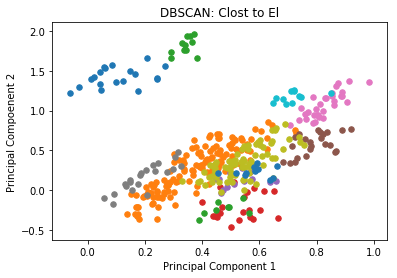

In [35]:
labels_for_plot = np.unique(labels)
labels_for_plot=[5,6,9,10,11,15,16,18,19,21,32, 33, 38]
desc_for_plot =[ 
                'Pop: 176,  Bus: .79,   El: .015, crime 1',
                'Pop: 55,   Bus: .27,   El: .019, crime 5' ,
                'Pop: 192,  Bus: .09,   El: .009, crime 2',
                 'Pop: 6,   Bus: 9,     El: .014, crime 0',
                 'Pop: 1,   Bus: 4,     El: .016, crime 3',
                 'Pop: 69,  Bus: .217,  El: .016, crime 7',
                 'Pop: 78,  Bus: 0,     El: .012, crime 6',
                 'Pop: 66,  Bus: .19,   El: .016, crime 4',
                 'Pop: 59,  Bus: .18,   El: .019, crime 6',
                 'Pop: 84,  Bus: .09,   El: .013, crime 5',
                 'Pop: 8,   Bus: 1.2,   El: .015, crime 5',
                 'Pop: 45,  Bus: .15,   El: .013, crime 5',
                 'Pop: 1.6, Bus: 3.125, El: .011, crime 4',
               
               ]
for dblabel, desc_for_plot in zip(labels_for_plot, desc_for_plot):
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=30, label=str(dblabel) + ': ' + desc_for_plot)
# plt.legend(bbox_to_anchor = [1,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Compoenent 2')
plt.title('DBSCAN: Clost to El')
plt.savefig('../../visualization/PCA_plots/dbscan/db_select_close_to_el.svg',  bbox_inches='tight')

In [202]:
df[df.db_labels==38].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.000000e+00,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000
mean,7.330127e+09,1.625000,3.125000,0.0,0.011412,1720.882797,0.0,41.879153,-87.673240,4.0,0.016034,38.0,0.473620,-0.233977
std,2.070861e+09,3.852179,0.353553,0.0,0.003928,764.313633,0.0,0.042690,0.030474,0.0,0.000934,0.0,0.061040,0.085702
min,2.705001e+09,0.000000,3.000000,0.0,0.007308,714.328985,0.0,41.819060,-87.711793,4.0,0.014771,38.0,0.389304,-0.374421
25%,7.682751e+09,0.000000,3.000000,0.0,0.008208,1133.280818,0.0,41.861833,-87.690938,4.0,0.015315,38.0,0.437729,-0.287384
50%,8.330002e+09,0.000000,3.000000,0.0,0.010690,1834.829328,0.0,41.882249,-87.670667,4.0,0.016031,38.0,0.471963,-0.231476
75%,8.372252e+09,0.500000,3.000000,0.0,0.014407,2276.695546,0.0,41.883443,-87.661368,4.0,0.016689,38.0,0.506145,-0.192108
max,8.410001e+09,11.000000,4.000000,0.0,0.017267,2802.713848,0.0,41.967840,-87.617511,4.0,0.017520,38.0,0.564107,-0.103068


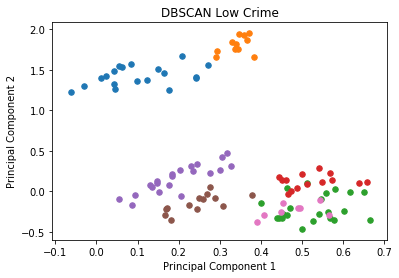

In [36]:
labels_for_plot = np.unique(labels)
labels_for_plot=[5,9,10,11,18, 33, 38]
desc_for_plot =[
#                 'Pop: 59,   Bus: .27,   El: .019, crime 4', 
                'Pop: 176,  Bus: .79,   El: .015, crime 1',
#                 'Pop: 55,   Bus: .27,   El: .019, crime 5',
                'Pop: 192,  Bus: .09,   El: .009, crime 2',
                 'Pop: 6,   Bus: 9,     El: .014, crime 0',
                 'Pop: 1,   Bus: 4,     El: .016, crime 3',
#                  'Pop: 69,  Bus: .217,  El: .016, crime 7',
#                  'Pop: 78,  Bus: 0,     El: .012, crime 6',
                 'Pop: 66,  Bus: .19,   El: .016, crime 4',
#                  'Pop: 59,  Bus: .18,   El: .019, crime 6',
#                  'Pop: 84,  Bus: .09,   El: .013, crime 5',
#                  'Pop: 8,   Bus: 1.2,   El: .015, crime 5',
                 'Pop: 45,  Bus: .15,   El: .013, crime 5',
                 'Pop: 1.6, Bus: 3.125, El: .011, crime 4',
               
               ]
for dblabel, desc_for_plot in zip(labels_for_plot, desc_for_plot):
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=30, label=str(dblabel) + ': ' + desc_for_plot)
# plt.legend(bbox_to_anchor = [1,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Low Crime')
plt.savefig('../../visualization/PCA_plots/dbscan/db_lower_crime.svg',  bbox_inches='tight')

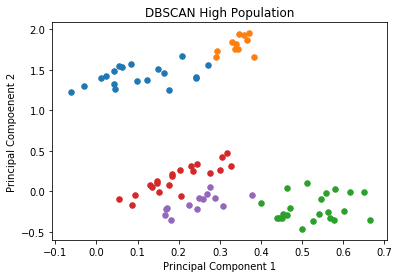

In [37]:
labels_for_plot = np.unique(labels)
labels_for_plot=[5,9,10,18, 33, 38]
desc_for_plot =[
#                 'Pop: 59,   Bus: .27,   El: .019, crime 4', 
                'Pop: 176,  Bus: .79,   El: .015, crime 1',
#                 'Pop: 55,   Bus: .27,   El: .019, crime 5',
                'Pop: 192,  Bus: .09,   El: .009, crime 2',
                 'Pop: 6,   Bus: 9,     El: .014, crime 0',
#                  'Pop: 1,   Bus: 4,     El: .016, crime 3',
#                  'Pop: 69,  Bus: .217,  El: .016, crime 7',
#                  'Pop: 78,  Bus: 0,     El: .012, crime 6',
                 'Pop: 66,  Bus: .19,   El: .016, crime 4',
#                  'Pop: 59,  Bus: .18,   El: .019, crime 6',
#                  'Pop: 84,  Bus: .09,   El: .013, crime 5',
#                  'Pop: 8,   Bus: 1.2,   El: .015, crime 5',
                 'Pop: 45,  Bus: .15,   El: .013, crime 5',
#                  'Pop: 1.6, Bus: 3.125, El: .011, crime 4',
               
               ]
for dblabel, desc_for_plot in zip(labels_for_plot, desc_for_plot):
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=30, label=str(dblabel) + ': ' + desc_for_plot)
# plt.legend(bbox_to_anchor = [1,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Compoenent 2')
plt.title('DBSCAN High Population')
plt.savefig('../../visualization/PCA_plots/dbscan/rm_very_low_pop.svg',  bbox_inches='tight')

In [222]:
blocks_for_prez = df[(df.db_labels==5) | (df.db_labels==9) | (df.db_labels==10) | (df.db_labels==18) | (df.db_labels==33)]

In [223]:
with open('df_for_prez.p', 'wb') as write_file:
    pickle.dump(blocks_for_prez, write_file)